# 3.2.1 Introduction to Language Processing

In [1]:
'''
Pattern within texts - are different for languages/authors

Properties of individual books - various authors and languages
    - book lengths
    - number of Unique words
    - How attributes clustere by language/author
    
Project Gutenberg - oldest online digital library
    gutenberg.org
    
'''

'\nPattern within texts - are different for languages/authors\n\nProperties of individual books - various authors and languages\n    - book lengths\n    - number of Unique words\n    - How attributes clustere by language/author\n    \nProject Gutenberg - oldest online digital library\n    gutenberg.org\n    \n'

# 3.2.2. Counting Words

In [2]:
text = "This is my text. We're keeping this text short to keep things manageable."

In [3]:
def count_words(text):
    '''
    Count the number of times each word occures in text (str). 
    Returns dictionary where keys are unique words and values are word counts.
    '''
    word_counts = {}
    for word in text.split(" "):
        #known word
        if word in word_counts:
            word_counts[word] += 1
        
        #unknown word
        else:
            word_counts[word] = 1
            
    return word_counts

In [4]:
count_words(text)

{'This': 1,
 "We're": 1,
 'is': 1,
 'keep': 1,
 'keeping': 1,
 'manageable.': 1,
 'my': 1,
 'short': 1,
 'text': 1,
 'text.': 1,
 'things': 1,
 'this': 1,
 'to': 1}

In [5]:
#punctuation with word :  text and text. 
#lower case : This, this
def count_words(text):
    '''
    Count the number of times each word occures in text (str). skip punctuation
    Returns dictionary where keys are unique words and values are word counts.
    
    '''
    text=text.lower()
    
    skips = [".", ",", ":", ";", "'", '"']
    for ch in skips:
        text = text.replace(ch,"")
    
    word_counts = {}
    
    for word in text.split(" "):
        #known word
        if word in word_counts:
            word_counts[word] += 1
        
        #unknown word
        else:
            word_counts[word] = 1
            
    return word_counts

In [7]:
count_words(text)

{'is': 1,
 'keep': 1,
 'keeping': 1,
 'manageable': 1,
 'my': 1,
 'short': 1,
 'text': 2,
 'things': 1,
 'this': 2,
 'to': 1,
 'were': 1}

In [11]:
#using counter object
from collections import Counter

def count_words_fast(text):
    '''
    Count the number of times each word occures in text (str). skip punctuation
    Returns dictionary where keys are unique words and values are word counts.
    
    '''
    text=text.lower()
    
    skips = [".", ",", ":", ";", "'", '"']
    for ch in skips:
        text = text.replace(ch,"")
    
    word_counts = Counter(text.split(" "))

    return word_counts

In [13]:
count_words(text) == count_words_fast(text)

True

In [14]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [15]:
count_words(text) is count_words_fast(text)

False

# 3.2.3 Reading in a Book

In [61]:

def read_book(title_path):
    '''
    Read a book and return it as a string
    '''
#    with open(title_path, "r", encoding="utf-8") as current_file:
    with open(title_path, "r", encoding="ISO-8859-1") as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
        
    return text    

In [62]:
text = read_book("./python_case_studies/books/English/Shakespeare/Romeo and Juliet.txt")

In [63]:
len(text)

161333

In [64]:
ind = text.find("What's in a name?")

In [65]:
ind

51240

In [38]:
sample_text = text[ind : ind + 1000]

In [39]:
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

# 3.2.4 Computing Word Frequency Statistics

In [67]:
def word_stats(word_counts):
    '''
    return number of unique word and word frequecy
    '''
    num_unique = len(word_counts)
    counts = word_counts.values()
    return(num_unique,counts)

In [76]:
text = read_book("./python_case_studies/books/English/Shakespeare/Romeo and Juliet.txt")

In [77]:
word_counts = count_words_fast(text)

In [79]:
type(word_counts)

collections.Counter

In [70]:
(num_unique, counts) = word_stats(word_counts)

In [71]:
num_unique

4920

In [72]:
sum(counts)

39424

Romeo Juliet German

In [83]:
text = read_book("./python_case_studies/books/German/Shakespeare/Romeo und Juliette.txt")

In [84]:
word_counts = count_words_fast(text)

In [85]:
(num_unique, counts) = word_stats(word_counts)

In [86]:
num_unique

8186

In [87]:
sum(counts)

26136

# 3.2.5 Reading Multiple Files

In [88]:
import os
book_dir = "./python_case_studies/books"

In [89]:
os.listdir(book_dir)

['English', 'German']

In [91]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir+"/"+language):
        for title in os.listdir(book_dir+"/"+language+"/"+author):
            inputfile = book_dir+"/"+language+"/"+author+"/"+title
            print(inputfile)

./python_case_studies/books/English/Shakespeare/hamlets.csv
./python_case_studies/books/English/Shakespeare/Romeo and Juliet.txt
./python_case_studies/books/German/Shakespeare/Romeo und Juliette.txt


In [92]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir+"/"+language):
        for title in os.listdir(book_dir+"/"+language+"/"+author):
            inputfile = book_dir+"/"+language+"/"+author+"/"+title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))

./python_case_studies/books/English/Shakespeare/hamlets.csv
./python_case_studies/books/English/Shakespeare/Romeo and Juliet.txt
./python_case_studies/books/German/Shakespeare/Romeo und Juliette.txt


In [93]:
'''
Pandas:
    Panel data (Multi Dimensional Struct data sets) Additional data s tructure and data analysis
    Manipulate numerical table and time series data

'''

'\nPandas:\n    Panel data (Multi Dimensional Struct data sets) Additional data s tructure and data analysis\n    Manipulate numerical table and time series data\n\n'

In [95]:
import pandas as pd

In [96]:
# dataframe - R - table
table = pd.DataFrame(columns=("name","age"))

table.loc[1] = "James", 22 #insert row 1
table.loc[2] = "Jess", 32

table

,name,age
1,James,22
2,Jess,32


In [97]:
table.columns

Index(['name', 'age'], dtype='object')

In [112]:
import os
book_dir = "./python_case_studies/books"

import pandas as pd
stats = pd.DataFrame(columns=("language","author","title","length", "unique"))
title_num = 1

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir+"/"+language):
        for title in os.listdir(book_dir+"/"+language+"/"+author):
            inputfile = book_dir+"/"+language+"/"+author+"/"+title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            
            stats.loc[title_num] = language, author, title, sum(counts), num_unique
            title_num += 1

./python_case_studies/books/English/Shakespeare/A Midsummer Night's Dream.txt
./python_case_studies/books/English/Shakespeare/Hamlet.txt
./python_case_studies/books/English/Shakespeare/hamlets.csv
./python_case_studies/books/English/Shakespeare/Macbeth.txt
./python_case_studies/books/English/Shakespeare/Othello.txt
./python_case_studies/books/English/Shakespeare/Richard III.txt
./python_case_studies/books/English/Shakespeare/Romeo and Juliet.txt
./python_case_studies/books/English/Shakespeare/The Merchant of Venice.txt
./python_case_studies/books/French/chevalier/L'åle de sable.txt
./python_case_studies/books/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./python_case_studies/books/French/chevalier/La capitaine.txt
./python_case_studies/books/French/chevalier/La fille des indiens rouges.txt
./python_case_studies/books/French/chevalier/La fille du pirate.txt
./python_case_studies/books/French/chevalier/Le chasseur noir.txt
./python_case_studies/books/French/chevalier/Les 

In [113]:
stats

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,Shakespeare,Hamlet.txt,28551,6776
3,English,Shakespeare,hamlets.csv,265408,19854
4,English,Shakespeare,Macbeth.txt,16874,4780
5,English,Shakespeare,Othello.txt,26590,5898
6,English,Shakespeare,Richard III.txt,48315,5449
7,English,Shakespeare,Romeo and Juliet.txt,40776,5118
8,English,Shakespeare,The Merchant of Venice.txt,20949,4978
9,French,chevalier,L'åle de sable.txt,73801,19004
10,French,chevalier,L'enfer et le paradis de l'autre monde.txt,40827,10840


In [114]:
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,Shakespeare,Hamlet.txt,28551,6776
3,English,Shakespeare,hamlets.csv,265408,19854
4,English,Shakespeare,Macbeth.txt,16874,4780
5,English,Shakespeare,Othello.txt,26590,5898


In [115]:
stats.tail()

,language,author,title,length,unique
100,Portuguese,Queir¢s,O crime do padre Amaro.txt,128630,29313
101,Portuguese,Queir¢s,O Mandarim.txt,21440,7839
102,Portuguese,Queir¢s,O Primo Bazilio.txt,107303,27658
103,Portuguese,Queir¢s,Os Maias.txt,195771,40680
104,Portuguese,shakespeare,Hamlet.txt,30567,9710


In [116]:
import os
book_dir = "./python_case_studies/books"

import pandas as pd
stats = pd.DataFrame(columns=("language", "author", "title", "length", "unique"))
title_num = 1

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir+"/"+language):
        for title in os.listdir(book_dir+"/"+language+"/"+author):
            inputfile = book_dir+"/"+language+"/"+author+"/"+title
#            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""), sum(counts), num_unique
            title_num += 1

In [117]:
stats

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,hamlets.csv,265408,19854
4,English,Shakespeare,Macbeth,16874,4780
5,English,Shakespeare,Othello,26590,5898
6,English,Shakespeare,Richard III,48315,5449
7,English,Shakespeare,Romeo and Juliet,40776,5118
8,English,Shakespeare,The Merchant of Venice,20949,4978
9,French,Chevalier,L'åle de sable,73801,19004
10,French,Chevalier,L'enfer et le paradis de l'autre monde,40827,10840


# 3.2.6 Plotting book Statistics

In [118]:
stats.length

1       16103
2       28551
3      265408
4       16874
5       26590
6       48315
7       40776
8       20949
9       73801
10      40827
11      46306
12      66621
13      52519
14      51341
15      55565
16      35905
17      25975
18      34723
19      37840
20      33481
21      43685
22      40688
23      41485
24      54772
25      10938
26      11125
27      21973
28       8510
29       4980
30      12370
        ...  
75      26136
76      74446
77      52996
78      48022
79      43575
80      46751
81      47739
82      61473
83      46927
84      46709
85      43445
86      45182
87      54151
88      45461
89      41175
90      50751
91      48889
92     134382
93     130834
94     109270
95      65225
96      52982
97      98218
98      77627
99      44293
100    128630
101     21440
102    107303
103    195771
104     30567
Name: length, Length: 104, dtype: object

In [119]:
stats.unique

1       4345
2       6776
3      19854
4       4780
5       5898
6       5449
7       5118
8       4978
9      19004
10     10840
11     13091
12     17881
13     14668
14     12957
15     15591
16     10730
17      8078
18     10212
19     10787
20      9988
21     12308
22     10896
23     11095
24     15054
25      3676
26      3724
27      6340
28      2933
29      1877
30      4370
       ...  
75      8186
76     18246
77     14559
78     15137
79     12769
80     12894
81     14346
82     16992
83     13462
84     13459
85     12485
86     12631
87     15877
88     13185
89     12328
90     14785
91     14405
92     30739
93     27844
94     26804
95     19233
96     16653
97     25358
98     21410
99     13906
100    29313
101     7839
102    27658
103    40680
104     9710
Name: unique, Length: 104, dtype: object

In [120]:
import matplotlib.pyplot as plt

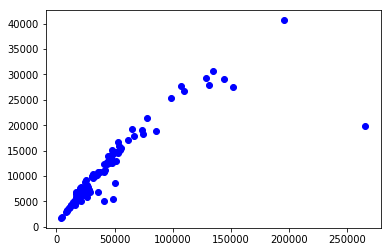

In [121]:
plt.plot(stats.length, stats.unique, "bo")